# core

> Fill in a module description here

In [1]:
#| default_exp core

In [27]:
from pathlib import Path
import pickle,gzip, math, os, time, shutil, matplotlib as mpl
import matplotlib.pyplot as plt


Get Data

In [28]:
# find MNIST dataset url
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data / "mnist.pkl.gz"



In [29]:
# download MNIST dataset
import requests
if not path_gz.exists():
    content = requests.get(MNIST_URL).content
    path_gz.open("wb").write(content)

In [30]:
# load MNIST dataset
with gzip.open(path_gz, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [31]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [32]:
# convert list to chunked list
def chunked_list(lst, chunk_size):
    return [lst[i:i+chunk_size] for i in range(0, len(lst), chunk_size)]

def chunks(lst, chunk_size):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i+chunk_size]
        
chuncked = chunked_list(lst1, 28)
len(chuncked)

28

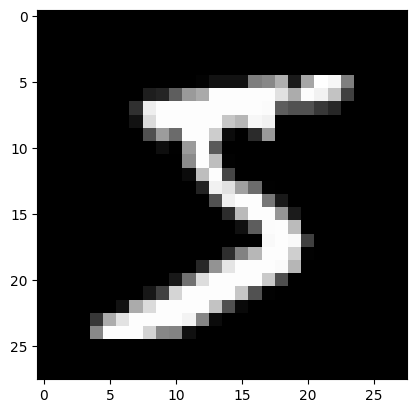

In [33]:
# plot the chunked item
plt.imshow(list(chunks(lst1, 28)), cmap='gray')

In [34]:
from itertools import islice

In [50]:
iter??

Docstring:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
Type:      builtin_function_or_method


In [51]:
it = iter(vals)

In [52]:
next(it)

0.0

In [46]:
list(islice(it,5)),list(islice(it,5)),list(islice(it,5))

([0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125],
 [])

In [58]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it,28)), []))

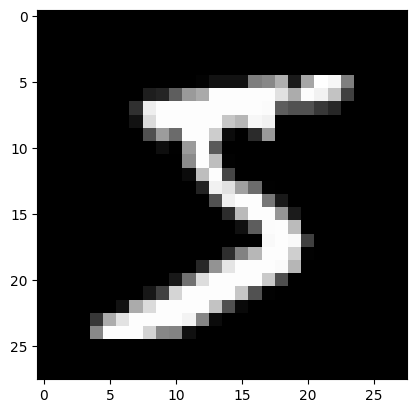

In [59]:
plt.imshow(img, cmap='gray')

In [61]:
# it = iter(lst1)
img[20][20]

0.0

In [70]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix
        self.rows = len(matrix)
        self.cols = len(matrix[0])
    def __getitem__(self, idx):
        return self.matrix[idx[0]][idx[1]]

In [71]:
m = Matrix(img)
m

In [73]:
m[20,15]

0.98828125

In [75]:
import torch
from torch import tensor

In [76]:
tensor(img)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [77]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

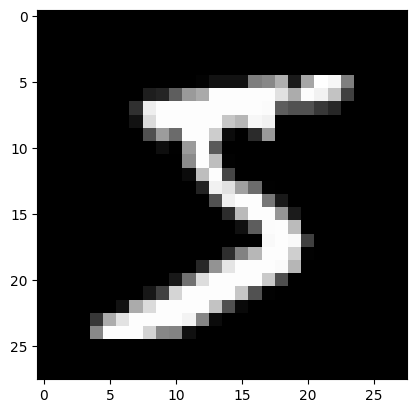

In [83]:
# plot the first matrix from x_train as image
plt.imshow(x_train[0].view(28,28), cmap='gray')

In [85]:
imgs = x_train.reshape((-1,28,28))

In [90]:
y_train

tensor([5, 0, 4,  ..., 8, 4, 8])

## Matrix Multiplication

In [93]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [95]:
m1 = x_train[:5]
m2 = weights

In [96]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [97]:
ar , ac = m1.shape
br , bc = m2.shape
assert ac == br, "Matrix multiplication is not possible"


In [98]:
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [101]:
t1 = torch.zeros([ar, bc])
t1.shape

torch.Size([5, 10])

In [102]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2[k,j]

In [104]:
torch.set_printoptions(edgeitems=2, linewidth=140)

In [105]:
t1

tensor([[  0.9577,  -2.9557,  -2.1148,   0.2679,   1.2794,  -5.2002, -10.3146, -15.0880, -17.6923,   0.6007],
        [  6.8906,  -0.3425,   0.7923, -14.7387,   6.9035,  -3.0802, -15.0396, -17.1321, -25.3572,  16.2312],
        [-10.1834,   7.3808,   4.1311,   3.2661,  13.8806,  -5.1509,  -7.1424,  -6.7345,  -6.7882,  -1.5788],
        [  0.9694,   2.3867, -15.2159,   7.7303,  -8.1857, -12.3311,  -5.9767,  -1.1720,   7.0489,  -1.4185],
        [  6.8513,  14.0698, -11.9205,   2.3367,   4.6249,  -3.3725,  -5.4689,  -0.6507, -30.5564,   7.8773]])

In [107]:
def matmul(a,b):
    ar , ac = a.shape
    br , bc = b.shape
    assert ac == br, "Matrix multiplication is not possible"
    t = torch.zeros([ar, bc])
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                t[i,j] += a[i,k] * b[k,j]
    return t

In [108]:
matmul(m1, m2)

tensor([[  0.9577,  -2.9557,  -2.1148,   0.2679,   1.2794,  -5.2002, -10.3146, -15.0880, -17.6923,   0.6007],
        [  6.8906,  -0.3425,   0.7923, -14.7387,   6.9035,  -3.0802, -15.0396, -17.1321, -25.3572,  16.2312],
        [-10.1834,   7.3808,   4.1311,   3.2661,  13.8806,  -5.1509,  -7.1424,  -6.7345,  -6.7882,  -1.5788],
        [  0.9694,   2.3867, -15.2159,   7.7303,  -8.1857, -12.3311,  -5.9767,  -1.1720,   7.0489,  -1.4185],
        [  6.8513,  14.0698, -11.9205,   2.3367,   4.6249,  -3.3725,  -5.4689,  -0.6507, -30.5564,   7.8773]])

In [ ]:
torch.set_printoptions(edgeitems=2, linewidth=140)

## Element Wise Multiplication

In [109]:
a  = tensor([10., 6, -4])
b  = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [110]:
a+b

tensor([12., 14.,  3.])

In [112]:
(a < b).float().mean()

tensor(0.6667)

In [113]:
m = tensor([[1.,2,3], [4,5,6],[7.,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [114]:
(m*m).sum().sqrt()

tensor(16.8819)

In [115]:
def matmul(a,b):
    ar , ac = a.shape
    br , bc = b.shape
    t = torch.zeros([ar, bc])
    for i in range(ar):
        for j in range(bc):
            t[i,j] = (a[i,:] * b[:,j]).sum()
    return t

In [116]:
from fastcore.test import test_close
test_close(matmul(m1, m2), t1)

In [117]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [122]:
c[None,:],c[:,None]

(tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [123]:
c[None],c[...,None]

(tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

## Einstein Summation

In [125]:
torch.einsum("ik,k->i", m1, c)

RuntimeError: einsum(): operands do not broadcast with remapped shapes [original->remapped]: [5, 784]->[5, 784] [3]->[1, 3]

# Clustering

In [1]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial

In [85]:
torch.set_printoptions(edgeitems=2, linewidth=140)
torch.manual_seed(42)

In [86]:
n_clusters = 6
n_samples = 250

In [87]:
# create random data for each cluster centered around a random point x,y
centroids = torch.randn(n_clusters, 2)*70-35
centroids

tensor([[ -11.4317,  -25.9833],
        [ -18.5876,  -18.8767],
        [-113.5999,  -48.0430],
        [ 119.5741,  -79.6598],
        [  -2.6840,  -16.2854],
        [   2.4433,   21.6550]])

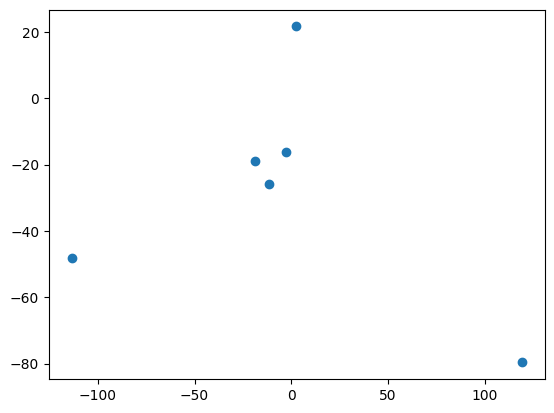

In [88]:
# plot the centroids
plt.scatter(centroids[:,0], centroids[:,1])

In [89]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [90]:
# create a multivariate normal distribution for each centroid
def sample(m): return MultivariateNormal(m, torch.eye(2)*5).sample((n_samples,))

In [91]:
slices = [sample(m) for m in centroids]
data = torch.cat(slices)
data.shape

torch.Size([1500, 2])

In [92]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        ax.scatter(data[i*n_samples:(i+1)*n_samples,0], data[i*n_samples:(i+1)*n_samples,1])
        ax.scatter(*centroid, color='red', marker='x', s=100)
    # plt.scatter(data[i*n_samples:(i+1)*n_samples,0], data[i*n_samples:(i+1)*n_samples,1])
    # # plot the cluster centroids
    # plt.scatter(centroids[:,0], centroids[:,1], marker='X', color='black',s=30)
    # plt.scatter(centroids[:,0], centroids[:,1], marker='X', color='red',s=10)


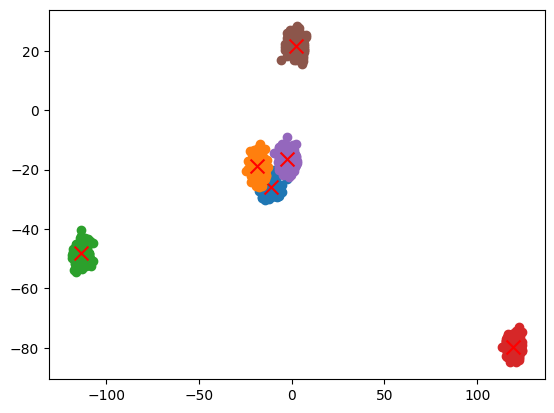

In [93]:
plot_data(centroids, data, n_samples)

In [94]:
data.mean(0)

tensor([ -4.0099, -27.8452])

In [95]:
def gaussian(d, bw): return torch.exp(-.5*((d/bw))**2)/ (bw*math.sqrt(2*math.pi))

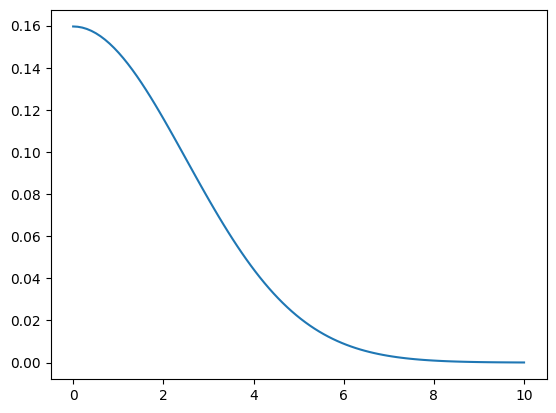

In [96]:
def plot_function(f, x, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.plot(x, f(x))

plot_function(partial(gaussian, bw=2.5), torch.linspace(0,10,100))


In [97]:
def tri(d, bw): return torch.clamp((1-(d/bw)), min=0)

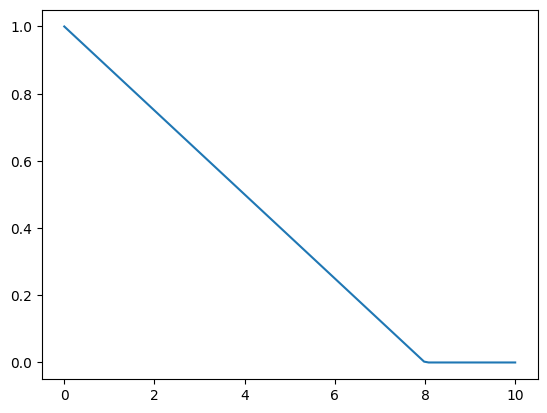

In [98]:
plot_function(partial(tri, bw=8), torch.linspace(0,10,100))


In [99]:
X= data.clone()
x = data[0]
x

tensor([-10.6359, -27.5187])

In [100]:
x.shape, X.shape, x[None].shape

(torch.Size([2]), torch.Size([1500, 2]), torch.Size([1, 2]))

In [101]:
(x-X)[:5]

tensor([[ 0.0000,  0.0000],
        [ 1.8989, -2.0753],
        [ 3.2798, -1.7400],
        [ 5.9765, -1.0505],
        [ 1.4883, -0.6505]])

In [102]:
dist = ((x-X)**2).sum(1).sqrt()
dist[:5]

tensor([0.0000, 2.8130, 3.7128, 6.0682, 1.6242])

In [103]:
(torch.einsum("ij,ij->i", (x-X), (x-X))).sqrt()[:5]

tensor([0.0000, 2.8130, 3.7128, 6.0682, 1.6242])

In [104]:
weight = gaussian(dist, 2.5)
weight

tensor([0.1596, 0.0847,  ..., 0.0000, 0.0000])

In [105]:
weight.shape, X.shape

(torch.Size([1500]), torch.Size([1500, 2]))

In [106]:
weight[:,None]*X

tensor([[-1.6973, -4.3913],
        [-1.0621, -2.1559],
        ...,
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000]])

In [113]:
def one_update(X):
    for i,x in enumerate(X):
        dist = ((x-X)**2).sum(1).sqrt()
        weight = gaussian(dist, 1)
        X[i] = (weight[:,None]*X).sum(0)/weight.sum()

In [114]:
def meanshift(X, n_iter=10):
    for i in range(n_iter): one_update(X)
    return X

X = meanshift(X, 5)

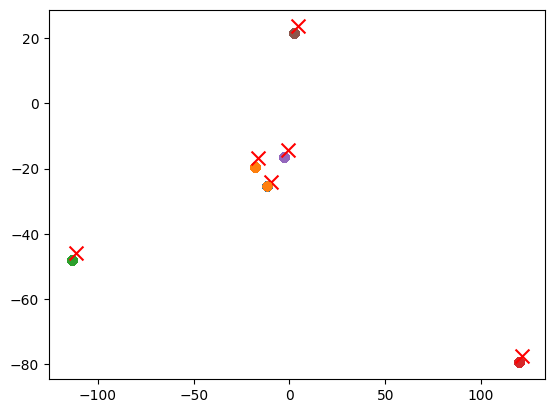

In [115]:
plot_data(centroids+2, X, n_samples)

In [110]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [111]:
def do_one(d):
    one_update(X)
    ax.clear()
    plot_data(centroids+2,X,n_samples, ax=ax)

In [112]:
X = data.clone()
fig, ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames=5, interval=500)
plt.close()
HTML(ani.to_jshtml())

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()